In [1]:
# important module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model

In [2]:
# Load the dataset
df = pd.read_csv('student_dataset.csv')

# Display the first few rows of the dataframe
df.head(10)

,Previous Exam Score,Attendance Percentage,Study Hours per Week,Age,Gender,Parental Education Level,Stress Level,Pass or Fail
0,81.388165,85.648000,5.520619,23,Male,Doctorate,3.833246,Pass
1,78.758294,50.574624,3.241544,22,Female,Associate Degree,5.369479,Pass
2,93.167890,70.438863,33.188915,24,Female,High School,5.301996,Pass
3,84.177906,96.201344,39.071775,21,Female,Master's Degree,5.242298,Pass
4,80.298490,55.594031,16.189003,24,Male,Bachelor's Degree,2.582054,Pass
5,36.801590,75.821219,3.505993,22,Non-binary,High School,2.304393,Fail
6,87.953424,89.326119,2.632470,19,Non-binary,High School,3.292908,Pass
7,71.246208,97.126565,35.652728,18,Non-binary,Associate Degree,9.230735,Pass
8,74.687375,87.338832,18.552570,21,Male,Master's Degree,2.017477,Pass
9,74.789998,86.028277,12.801093,21,Female,Bachelor's Degree,7.816826,Pass


In [3]:
# Check for missing values
print(df.isnull().sum())

# Encode categorical variables using one-hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
encoded_features = ohe.fit_transform(df[['Gender', 'Parental Education Level']]).toarray()
feature_names = ohe.get_feature_names_out(['Gender', 'Parental Education Level'])
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

df = df.drop(['Gender', 'Parental Education Level'], axis=1)


# Encode 'Pass or Fail' column
df['Pass or Fail'] = df['Pass or Fail'].apply(lambda x: 1 if x == 'Pass' else 0)

df.head(10)

Previous Exam Score         0
Attendance Percentage       0
Study Hours per Week        0
Age                         0
Gender                      0
Parental Education Level    0
Stress Level                0
Pass or Fail                0
dtype: int64


,Previous Exam Score,Attendance Percentage,Study Hours per Week,Age,Stress Level,Pass or Fail
0,81.388165,85.648000,5.520619,23,3.833246,1
1,78.758294,50.574624,3.241544,22,5.369479,1
2,93.167890,70.438863,33.188915,24,5.301996,1
3,84.177906,96.201344,39.071775,21,5.242298,1
4,80.298490,55.594031,16.189003,24,2.582054,1
5,36.801590,75.821219,3.505993,22,2.304393,0
6,87.953424,89.326119,2.632470,19,3.292908,1
7,71.246208,97.126565,35.652728,18,9.230735,1
8,74.687375,87.338832,18.552570,21,2.017477,1
9,74.789998,86.028277,12.801093,21,7.816826,1


In [4]:
df['Pass or Fail'].value_counts()

,count
Pass or Fail,
1,753
0,421


In [5]:
df_shuffled = df.sample(frac=1, random_state=42)

In [6]:
df_shuffled.head(10)

,Previous Exam Score,Attendance Percentage,Study Hours per Week,Age,Stress Level,Pass or Fail
410,68.285681,82.802751,32.150209,20,8.651548,1
430,50.979467,87.080131,0.272588,19,8.565433,1
675,49.000000,77.200000,3.300000,15,8.800000,0
208,76.710390,99.165283,10.824800,20,1.720806,1
811,89.499611,74.629950,14.007947,20,8.441264,1
665,31.000000,56.300000,9.700000,17,9.100000,0
1066,37.000000,71.300000,4.500000,18,6.800000,0
832,88.292554,65.394319,21.892987,18,4.637336,1
58,75.342503,56.074770,2.985537,19,8.015976,1
1107,34.000000,70.300000,3.200000,17,7.900000,0


In [7]:
# Features and target
X = df_shuffled.drop('Pass or Fail', axis=1)
y = df_shuffled['Pass or Fail']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)



print(X_train.shape)
print(X_test.shape)

print(y_test)
print(y_train)

(939, 5)
(235, 5)
481    1
221    1
843    1
309    1
175    1
      ..
101    1
454    1
178    1
330    1
617    1
Name: Pass or Fail, Length: 235, dtype: int64
546     1
427     1
193     1
903     0
61      1
       ..
556     1
14      1
776     1
191     1
1157    0
Name: Pass or Fail, Length: 939, dtype: int64


In [15]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4987 - loss: 1.3751 - val_accuracy: 0.8766 - val_loss: 0.3197
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8928 - loss: 0.2820 - val_accuracy: 0.9362 - val_loss: 0.1720
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9199 - loss: 0.2046 - val_accuracy: 0.9532 - val_loss: 0.1308
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9306 - loss: 0.1898 - val_accuracy: 0.9574 - val_loss: 0.1182
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9473 - loss: 0.1465 - val_accuracy: 0.9660 - val_loss: 0.1089
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9441 - loss: 0.1368 - val_accuracy: 0.9787 - val_loss: 0.0941
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9524 - loss: 0.1250 - val_accuracy: 0.9702 - val_loss: 0.0907
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9511 - loss: 0.1304 - val_accuracy: 0.9660 - val_loss

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predict the results
y_pred = (model.predict(X_test) > 0.5).astype('int32')

# Classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9833 - loss: 0.0607 
Test Accuracy: 0.9787
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        84
           1       0.99      0.98      0.98       151

    accuracy                           0.98       235
   macro avg       0.98      0.98      0.98       235
weighted avg       0.98      0.98      0.98       235

[[ 82   2]
 [  3 148]]
[[ 82   2]
 [  3 148]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9833 - loss: 0.0607 
Test Accuracy: 0.9787
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        84
           1       0.99      0.98      0.98       151

    accuracy                           0.98       235
   macro avg       0.98      0.98      0.98       235
weighted avg       0.98      0.98      0.98       235



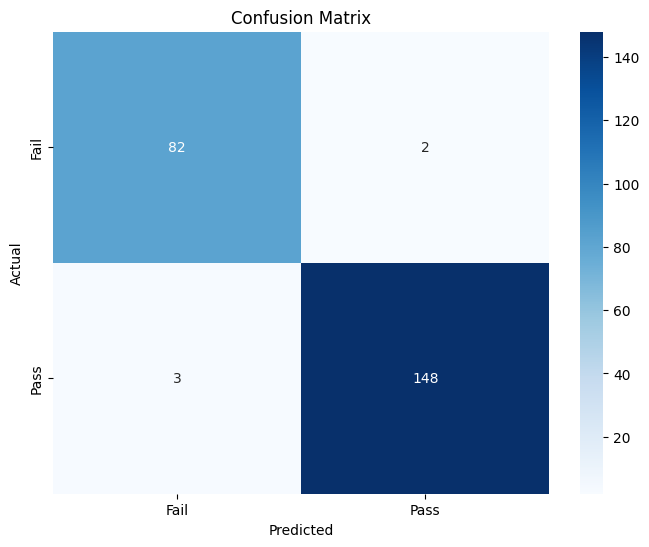

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predict the results
y_pred = (model.predict(X_test) > 0.5).astype('int32')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

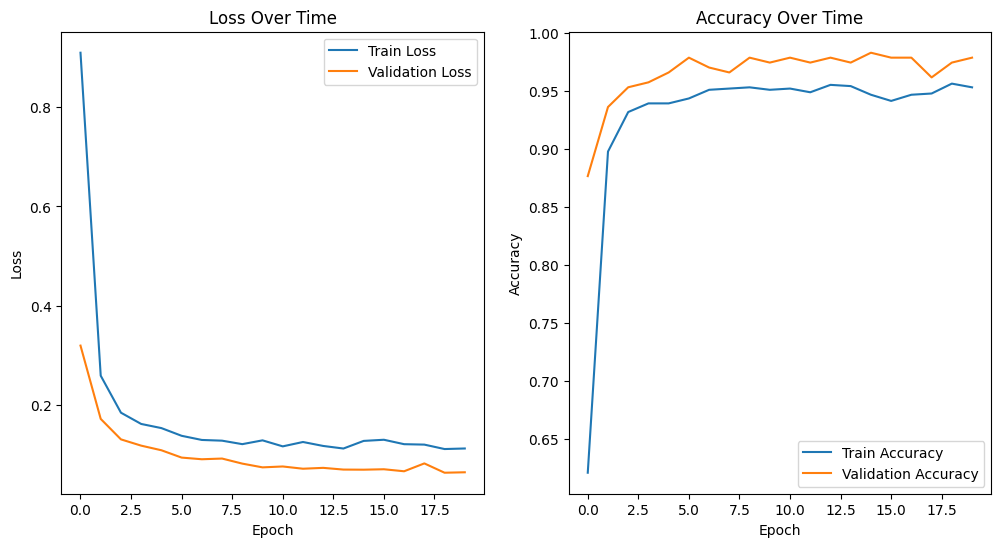

In [19]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Time')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Time')

plt.show()

In [21]:
model.save("student_model.h5")
print("Model saved successfully as student_model.h5")

Model saved successfully as student_model.h5
